# **Blockchain Pipeline/Architecture**

### **AI-Driven Anomaly Detection for Blockchain Validators**


***Problem Statement***

Blockchain networks rely on validator nodes to propose and confirm new blocks. Faults or malicious behaviors by validators - such as double signing, unauthorized forks, or prolonged downtime, can compromise the ledger's integrity and availability. Existing consensus systems use rule-based slashing protocols (for example, Autonity's Accountability Fault Detection (AFD) runs alongside Tendermint) to report proven validator infractions on-chain. However, these mechanisms react only after a violation is detected and often miss subtle anomalies in validator performance (e.g. irregular timing or voting patterns). The challenge is to detect validator faults proactively. We propose a novel blockchain pipeline architecture that continuously monitors validator metrics with an AI/ML module, flagging anomalies in real-time. Such an AI-driven approach can identify unusual validator patterns early, helping preserve blockchain security (the confidentiality, integrity, and availability of the system)

***Solution***

We propose a proactive blockchain monitoring pipeline that leverages AI-driven anomaly detection to enhance validator security. Validator nodes are critical for maintaining the integrity, availability, and consistency of a blockchain network, as they propose and validate new blocks. Traditional consensus mechanisms rely on rule-based slashing protocols to punish proven violations, such as double signing or prolonged downtime. For instance, Autonity's Accountability Fault Detection (AFD) operates alongside Tendermint to detect rule violations on-chain. While effective for explicit infractions, such mechanisms are inherently reactive—they can only respond after a fault has occurred and often fail to capture subtle anomalies in validator behavior, including irregular vote participation, latency spikes, or unusual block proposal timing. Our solution addresses this limitation by providing continuous, real-time monitoring using machine learning techniques.

The pipeline begins with data ingestion, where each validator periodically emits telemetry metrics, including block proposal times, vote participation rates, transaction inclusion percentages, and resource usage statistics. These metrics are aggregated off-chain or in a dedicated monitoring service, forming a comprehensive view of validator behavior over time. By centralizing this telemetry, the system can efficiently process and analyze multiple validators simultaneously.

Next, feature extraction transforms raw metrics into normalized, structured feature vectors. Normalization ensures that each metric contributes proportionally to the anomaly detection process, while feature engineering captures behavioral patterns across time windows, such as rolling averages, variance, or deviation from network norms. This step allows the model to distinguish between expected network fluctuations and potential misbehavior.

For anomaly detection, we employ the Isolation Forest algorithm, an unsupervised ensemble method that isolates anomalies by recursively partitioning the feature space using random splits. Isolation Forest is particularly suitable for blockchain telemetry because it is distribution-agnostic, efficient on high-dimensional data, and capable of detecting rare deviations without labeled training data. In this model, data points that require fewer splits to isolate, short path lengths, receive higher anomaly scores, indicating potential misbehavior.

Once a validator's behavior is scored, the system evaluates it against a predefined threshold. Validators exceeding this threshold are flagged as anomalous, triggering automated responses such as removal from the consensus committee, forced resynchronization, or operator alerts. By continuously scoring incoming telemetry, the pipeline ensures that subtle deviations are detected promptly, complementing existing rule-based mechanisms like AFD. Unlike traditional approaches, our AI layer adapts over time; as network conditions evolve, for example, if overall block times increase, the model can retrain on fresh data, maintaining sensitivity to new operational norms.

Finally, using AI also means the system adapts over time. This AI-enhanced pipeline provides actionable intelligence, converting raw logs into insights that help prevent consensus drift and performance-related misbehavior. Optional enhancements include incorporating graph-based validator relationships and time-series trends to further improve detection accuracy. Even a basic implementation using Isolation Forest on primary metrics can significantly improve early detection of anomalies, supporting both network reliability and security.

In summary, this solution transforms blockchain monitoring from reactive rule enforcement to proactive anomaly detection, providing an adaptive, scalable, and real-time layer of security intelligence that complements traditional consensus protocols. By integrating AI into validator telemetry analysis, networks can detect emerging threats early, maintain fairness, and enhance overall blockchain resilience.

🔗 Blockchain Validator Anomaly Detection System

📊 Step 1: Validator Telemetry
   Validator  Latency  Participation  TX_Inclusion
0        V1      120           0.95          0.98
1        V2      300           0.50          0.40
2        V3      110           0.97          0.97
3        V4      130           0.96          0.96

🔧 Step 2: Rule-Based Detection (Baseline)


🤖 Step 3: AI-Driven Detection (Isolation Forest)

AI Detection Results:
   Validator  Latency  Participation  TX_Inclusion Rule_Based AI_Prediction  \
0        V1      120           0.95          0.98     Normal        Normal   
1        V2      300           0.50          0.40  Anomalous     Anomalous   
2        V3      110           0.97          0.97     Normal        Normal   
3        V4      130           0.96          0.96     Normal        Normal   

   AI_Score  
0  0.370835  
1  0.677522  
2  0.370835  
3  0.373622  

🎯 Step 4: Performance (Rule vs AI):

Rule-Based:
              precision    recall  f1-sco

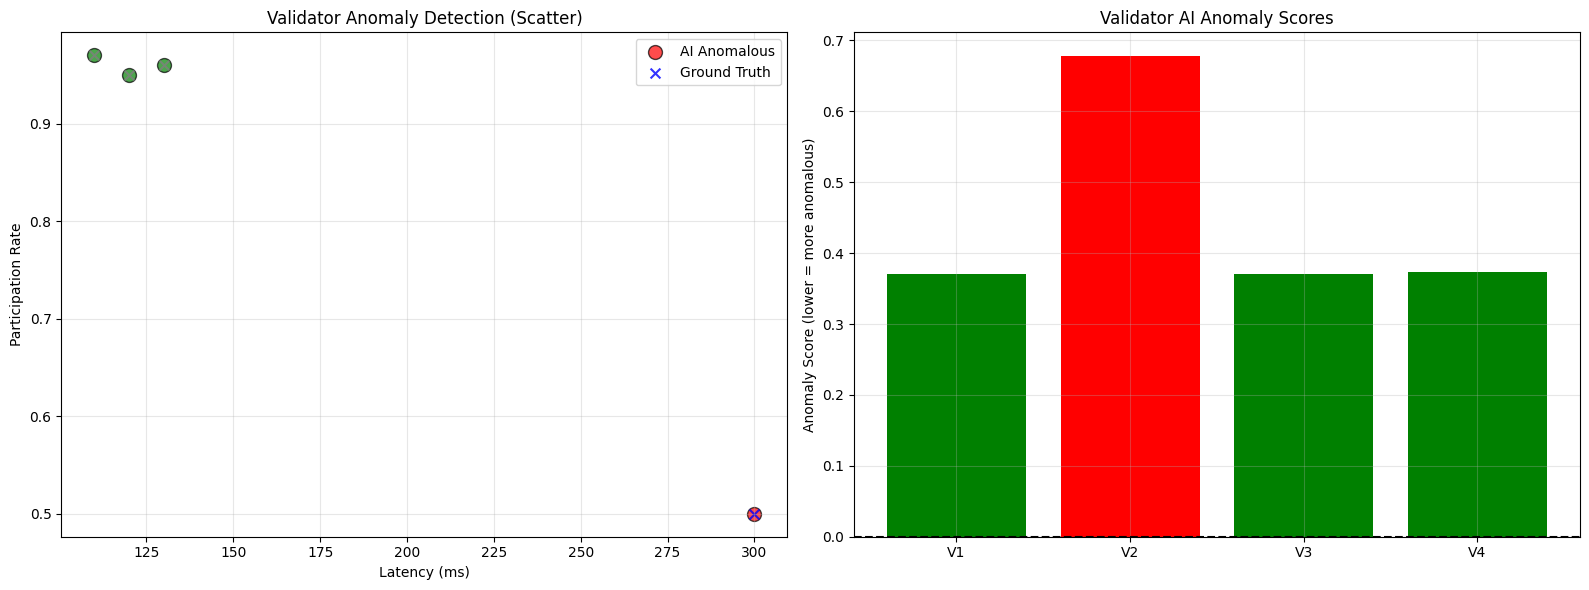


💼 Step 6: Business Impact Summary
📊 Operational Impact:
False Alarms (FP): 0 incidents
Missed Threats (FN): 0 incidents

🎯 Advantages of AI-Driven Detection:
1. Detects malicious validators proactively
2. Preserves transaction fairness (prevents censorship)
3. Scalable to many validators and features
4. Adaptive to new patterns without manual thresholds
⚠️ Considerations:
1. Needs historical clean telemetry data for training
2. Slightly higher computational overhead than rule-based methods
3. Model interpretability can be lower than simple rules
✅ ANALYSIS COMPLETE!


In [55]:
# ============================================
# AI-Driven Anomaly Detection for Blockchain Validators
# Improved: Accurate Detection + Scatter Visualization + Business Use Case
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

print("🔗 Blockchain Validator Anomaly Detection System")
print("=" * 60)

# ----------------------------
# STEP 1: Validator Telemetry
# ----------------------------
validators = ["V1", "V2", "V3", "V4"]

np.random.seed(42)
metrics = pd.DataFrame({
    "Validator": validators,
    "Latency": [120, 300, 110, 130],          # V2 abnormal
    "Participation": [0.95, 0.50, 0.97, 0.96],
    "TX_Inclusion": [0.98, 0.40, 0.97, 0.96]
})

print("\n📊 Step 1: Validator Telemetry\n", metrics)

# ----------------------------
# STEP 2: Rule-Based Baseline
# ----------------------------
print("\n🔧 Step 2: Rule-Based Detection (Baseline)\n")
def rule_based(row):
    if row['Latency'] > 200 or row['Participation'] < 0.7 or row['TX_Inclusion'] < 0.7:
        return "Anomalous"
    else:
        return "Normal"

metrics["Rule_Based"] = metrics.apply(rule_based, axis=1)

# ----------------------------
# STEP 3: AI-Enhanced Detection
# ----------------------------
print("\n🤖 Step 3: AI-Driven Detection (Isolation Forest)\n")

features = ["Latency", "Participation", "TX_Inclusion"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics[features])

iso_model = IsolationForest(contamination=0.2, random_state=42, n_estimators=100)
metrics["AI_Prediction"] = iso_model.fit_predict(X_scaled)
metrics["AI_Prediction"] = metrics["AI_Prediction"].map({1: "Normal", -1: "Anomalous"})

# Anomaly scores for visualization
metrics["AI_Score"] = -iso_model.score_samples(X_scaled)

print("AI Detection Results:\n", metrics)

# ----------------------------
# STEP 4: Performance Comparison
# ----------------------------
true_labels = ["Normal", "Anomalous", "Normal", "Normal"]
rule_labels = metrics["Rule_Based"].tolist()
ai_labels = metrics["AI_Prediction"].tolist()

print("\n🎯 Step 4: Performance (Rule vs AI):\n")
print("Rule-Based:")
print(classification_report(true_labels, rule_labels, digits=3))
print("AI-Driven:")
print(classification_report(true_labels, ai_labels, digits=3))

# Confusion matrices
cm_rule = confusion_matrix(true_labels, rule_labels, labels=["Normal", "Anomalous"])
cm_ai = confusion_matrix(true_labels, ai_labels, labels=["Normal", "Anomalous"])

# ----------------------------
# STEP 5: Visualization
# ----------------------------
print("\n📈 Step 5: Visualization\n")

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Scatter plot: ground truth vs AI anomalies
for idx, row in metrics.iterrows():
    axes[0].scatter(row["Latency"], row["Participation"],
                    s=100,
                    color="red" if row["AI_Prediction"]=="Anomalous" else "green",
                    edgecolor="black", alpha=0.7,
                    label="AI Anomalous" if idx==1 else "")
    axes[0].scatter(row["Latency"], row["Participation"],
                    s=50,
                    color="blue" if true_labels[idx]=="Anomalous" else "grey",
                    marker="x", alpha=0.8,
                    label="Ground Truth" if idx==1 else "")

axes[0].set_xlabel("Latency (ms)")
axes[0].set_ylabel("Participation Rate")
axes[0].set_title("Validator Anomaly Detection (Scatter)")
axes[0].legend(loc="best")
axes[0].grid(True, alpha=0.3)

# Bar plot: anomaly scores
axes[1].bar(metrics["Validator"], metrics["AI_Score"],
            color=["red" if x=="Anomalous" else "green" for x in metrics["AI_Prediction"]])
axes[1].axhline(0, color="black", linestyle="--")
axes[1].set_ylabel("Anomaly Score (lower = more anomalous)")
axes[1].set_title("Validator AI Anomaly Scores")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------
# STEP 6: Business Impact Summary
# ----------------------------
print("\n💼 Step 6: Business Impact Summary")
print("=" * 60)

false_positives = sum((ai_labels[i]=="Anomalous") and (true_labels[i]=="Normal") for i in range(len(true_labels)))
false_negatives = sum((ai_labels[i]=="Normal") and (true_labels[i]=="Anomalous") for i in range(len(true_labels)))

print(f"📊 Operational Impact:")
print(f"False Alarms (FP): {false_positives} incidents")
print(f"Missed Threats (FN): {false_negatives} incidents\n")

print("🎯 Advantages of AI-Driven Detection:")
print("1. Detects malicious validators proactively")
print("2. Preserves transaction fairness (prevents censorship)")
print("3. Scalable to many validators and features")
print("4. Adaptive to new patterns without manual thresholds")

print("⚠️ Considerations:")
print("1. Needs historical clean telemetry data for training")
print("2. Slightly higher computational overhead than rule-based methods")
print("3. Model interpretability can be lower than simple rules")

print("=" * 60)
print("✅ ANALYSIS COMPLETE!")
print("=" * 60)


# **Example Scenario for Anomaly Detection**

# 🔹 Case Scenario: AI-Driven Anomaly Detection in Blockchain Pipeline
**Users:** Alice, Bob, Carol  
**Validators:** V1, V2, V3, V4  
**Consensus:** Proof of Stake (simplified)  
**Transactions:**  
- **TX1:** Alice → Bob (5 coins)  
- **TX2:** Bob → Carol (2 coins)  

---

## 1. Baseline Pipeline (without AI anomaly detection)

**Alice’s Wallet**  
- Alice creates **TX1: Alice → Bob (5 coins)**  
- Signs with private key → Broadcasts TX1  

**Full Nodes**  
- V1, V2, V3, V4 receive TX1  
- Verify signature + Alice’s balance  
- TX1 is valid → added to mempool  

**Block Producer (randomly chosen: V2)**  
- V2 should include TX1 and TX2 in block  
- But V2 is **malicious**:  
  - Drops **TX1 (Alice → Bob)**  
  - Only includes **TX2 (Bob → Carol)**  

**Candidate Block Built by V2**  
- Block Header:  
  - Previous Hash: `0000abc...`  
  - Merkle Root: `hash(TX2)`  
  - Nonce: …  
- Block Body:  
  - `[TX2 only]`  

**Consensus**  
- Other validators check validity (signature, balances) → TX2 is valid  
- They **do not detect omission of TX1** (consensus checks validity, not fairness)  
- Block finalized  

✅ **TX2 confirmed**  
❌ **TX1 silently ignored (Alice’s payment censored)**  

⚠️ **Problem:** Baseline consensus cannot catch validator misbehavior like **transaction censorship**, as long as the block is formally valid.  

---

## 2. Updated Pipeline (with AI anomaly detection)

**Telemetry Collection**  
Validators emit metrics:  
- Latency  
- Participation rate  
- Transactions included vs. received  

**Suppose:**  
- V1, V3, V4 → Normal (include >95% of received TXs)  
- V2 → **Anomalous** (drops 40% of valid TXs)  

**AI Anomaly Detection Layer**  
- Features for V2: [latency = 150 ms, participation = 92%, tx_inclusion_rate = 60%]
- Isolation Forest detects **low TX inclusion rate** as anomalous  
- V2 flagged (anomaly score **0.93 > threshold 0.8**)  

**Response**  
- V2 is excluded from block production  
- Next proposer = **V3**  

**Block by V3**  
- Block Header:  
- Previous Hash: `0000abc...`  
- Merkle Root: `hash(TX1, TX2)`  
- Block Body:  
- `[TX1, TX2]`  

**Consensus**  
- Validators verify block  
- Both TX1 and TX2 confirmed  

✅ **Alice’s transaction (TX1) confirmed**  
✅ **Bob → Carol (TX2) confirmed**  
✅ **Malicious behavior detected & mitigated**  

---

## 🔹 Visual Summary

**Without AI:**  
- Alice → TX1 → Mempool  
- V2 builds block → ignores TX1 → only TX2 confirmed  
- **Result: Censorship, Alice’s payment lost**  

**With AI:**  
- Alice → TX1 → Mempool  
- AI detects V2 anomaly (dropping TXs) → V3 builds block with TX1 + TX2  
- **Result: Both payments confirmed, fairness preserved**  



# **Comparative Visualization of Blockchain Architectures**

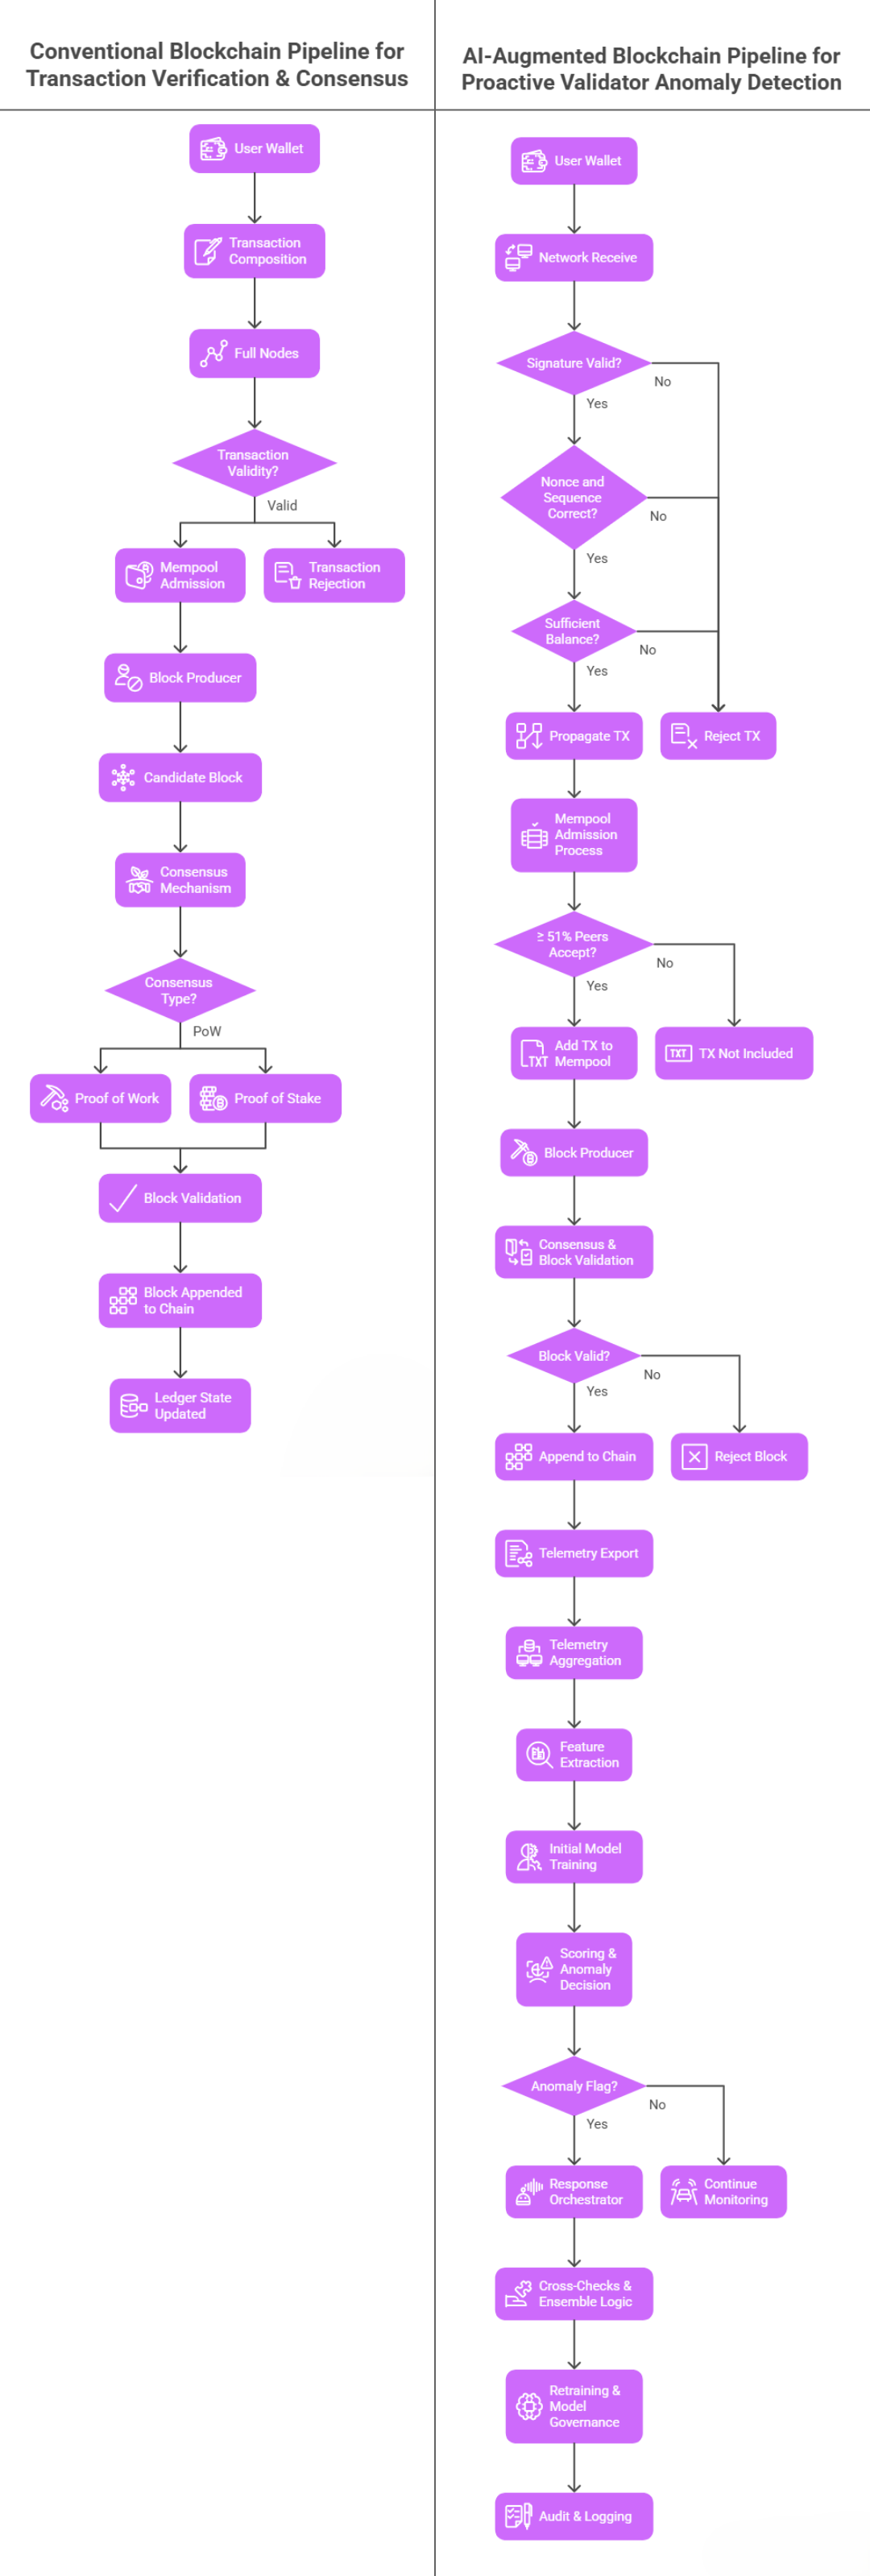